In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
###### CRISPR sample

!gdown 1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO
!gdown 1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS

### To make thinngs faster for the student, here is the indexed mouse genome, mm10.
### You have to donwload it and decompressed it, you will get both the fasta and the BWT'ed files. Note all have same prefix Mouse<.files>.
### Next semester we will cover how specialized computers are often used to solve this aligmnet problems faster.

!gdown 1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar

Downloading...
From (original): https://drive.google.com/uc?id=1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO
From (redirected): https://drive.google.com/uc?id=1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO&confirm=t&uuid=2cc90be8-bc8c-4d07-ae44-5e59a2d32474
To: /content/CRISPR.R1.fastq
100% 2.67G/2.67G [00:32<00:00, 81.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS
From (redirected): https://drive.google.com/uc?id=1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS&confirm=t&uuid=1d1375dc-f886-4fc2-89bc-4e418b090809
To: /content/CRISPR.R2.fastq
100% 2.67G/2.67G [00:44<00:00, 60.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar
From (redirected): https://drive.google.com/uc?id=1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar&confirm=t&uuid=ff76f6d8-d95b-4666-8af2-e57247e4f347
To: /content/MM10.tar.gz
100% 3.91G/3.91G [01:40<00:00, 39.0MB/s]


In [ ]:
!tar -xzvf MM10.tar.gz

MM10/
MM10/Mouse.ann
MM10/Mouse.pac
MM10/Mouse.fasta
MM10/Mouse.bwt
MM10/Mouse.sa
MM10/Mouse.amb


In [ ]:
#import bwa from bin bash

!apt-get update
!apt-get install bwa

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,224 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/

In [ ]:
#switch directories from current to MM10 file

%cd MM10
!ls


/content/MM10
Mouse.amb  Mouse.ann  Mouse.bwt  Mouse.fasta  Mouse.pac  Mouse.sa


In [ ]:
!bwa index Mouse.fasta

[bwa_index] Pack FASTA... 27.51 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=5451075338, availableWord=395557796
[BWTIncConstructFromPacked] 10 iterations done. 99999994 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 199999994 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 299999994 characters processed.
[BWTIncConstructFromPacked] 40 iterations done. 399999994 characters processed.
[BWTIncConstructFromPacked] 50 iterations done. 499999994 characters processed.
[BWTIncConstructFromPacked] 60 iterations done. 599999994 characters processed.
[BWTIncConstructFromPacked] 70 iterations done. 699999994 characters processed.
[BWTIncConstructFromPacked] 80 iterations done. 799999994 characters processed.
[BWTIncConstructFromPacked] 90 iterations done. 899999994 characters processed.
[BWTIncConstructFromPacked] 100 iterations done. 999999994 characters processed.
[BWTIncConstructFromPacked] 110 iterations done. 

In [ ]:
%cd ..

/content


In [ ]:
!ls

CRISPR.R1.fastq  CRISPR.R2.fastq  drive  MM10  MM10.tar.gz  sample_data


In [ ]:
!bwa mem MM10/Mouse.fasta CRISPR.R1.fastq CRISPR.R2.fastq > aligned_reads.sam


[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 100000 sequences (10000000 bp)...
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (1, 46782, 0, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (208, 255, 307)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (10, 505)
[M::mem_pestat] mean and std.dev: (263.49, 57.15)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 604)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 100000 reads in 23.716 CPU sec, 26.209 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 47080, 0, 0)
[M::mem_pestat] skip orientati

In [ ]:
!apt install samtools
!samtools view -bS aligned_reads.sam > aligned_reads.bam
!samtools sort aligned_reads.bam -o sorted_reads.bam
!samtools index sorted_reads.bam


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libhts3 libhtscodecs2
Suggested packages:
  cwltool
The following NEW packages will be installed:
  libhts3 libhtscodecs2 samtools
0 upgraded, 3 newly installed, 0 to remove and 51 not upgraded.
Need to get 963 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhtscodecs2 amd64 1.1.1-3 [53.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhts3 amd64 1.13+ds-2build1 [390 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 samtools amd64 1.13-4 [520 kB]
Fetched 963 kB in 0s (4,093 kB/s)
Selecting previously unselected package libhtscodecs2:amd64.
(Reading database ... 123649 files and directories currently installed.)
Preparing to unpack .../libhtscodecs2_1.1.1-3_amd64.deb ...
Unpacking libhtscodecs2:amd64 (1.1.

In [ ]:
##so now we perform variant calling using bcftools
!apt install bcftools


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bcftools is already the newest version (1.13-1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


In [ ]:
!bcftools mpileup -f MM10/Mouse.fasta sorted_reads.bam | bcftools call -mv -Ov -o variants.vcf

Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[mpileup] 1 samples in 1 input files
[mpileup] maximum number of reads per input file set to -d 250


In [ ]:
!cp variants.vcf drive/MyDrive/MSGDA/Bioinformatics/

Intended Mutations:
     Chromosome  Position Reference Alternate
5102       chr2  36937210         C         T
5103       chr2  36996899    CTTTTT   CTTTTTT
6359       chr2  85400441         A         G
6368       chr2  85776687         T         A
6374       chr2  85918029         T         C
6383       chr2  86198668         A         G
6390       chr2  86236802        CT       CTT
6414       chr2  86658391         C        CG
6425       chr2  87049235         G         T

Off-Target Mutations:
     Chromosome   Position Reference Alternate
4360       chr2    3142822         C         G
4361       chr2    3239877         A         T
4362       chr2    3247123         G         C
4363       chr2    3334710         T         C
4364       chr2    3334712         T         C
...         ...        ...       ...       ...
8348       chr2  180921497         G         C
8349       chr2  180948811         A         T
8350       chr2  181002928         T         A
8351       chr2  181395626 

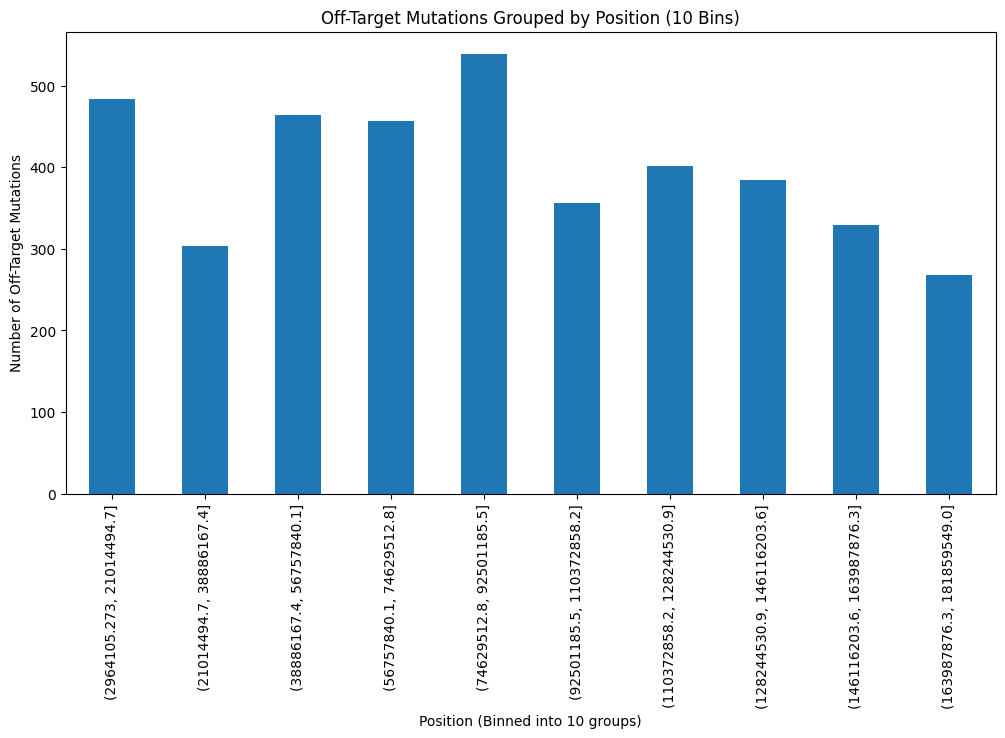

In [ ]:
import pandas as pd

# Load the VCF file
vcf_file = "variants.vcf"
intended_sites = [
    36937210, 36996899, 85400441, 85776687, 85918029,
    86198668, 86236802, 86658391, 87049235
]

# Parse VCF
def parse_vcf(vcf_file):
    rows = []
    with open(vcf_file, 'r') as file:
        for line in file:
            if line.startswith("#"):
                continue
            fields = line.strip().split("\t")
            chrom, pos, _, ref, alt = fields[:5]
            rows.append((chrom, int(pos), ref, alt))
    return pd.DataFrame(rows, columns=["Chromosome", "Position", "Reference", "Alternate"])

# Identify mutations
variants = parse_vcf(vcf_file)

# Separate intended mutations
chromosome_2_variants = variants[variants["Chromosome"] == "chr2"]
intended_mutations = chromosome_2_variants[chromosome_2_variants["Position"].isin(intended_sites)]

# Detect off-target mutations
off_target_mutations = chromosome_2_variants[~chromosome_2_variants["Position"].isin(intended_sites)]

# Summary of off-target mutations
off_target_summary = off_target_mutations.groupby("Chromosome").size().reset_index(name="Mutation_Count")

# Save results to DataFrames
print("Intended Mutations:")
print(intended_mutations)

print("\nOff-Target Mutations:")
print(off_target_mutations)

print("\nOff-Target Summary:")
print(off_target_summary)


import matplotlib.pyplot as plt
# Plot example with Position as the X-axis for off-target mutations

# Bin the Position values into 10 equal intervals
bins = pd.cut(off_target_mutations["Position"], bins=10)

# Count the number of mutations in each bin
mutation_counts = bins.value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(12, 6))
mutation_counts.plot(kind='bar')

# Customize the plot
plt.xlabel("Position (Binned into 10 groups)")
plt.ylabel("Number of Off-Target Mutations")
plt.title("Off-Target Mutations Grouped by Position (10 Bins)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
##holy cow